# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
    * 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


# 2.환경준비

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

## (1) Sales (Target) 

In [80]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량(수치화)

In [81]:
def des(data,var):
    display(data[[var]].describe().T)
des(data,var)

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27


3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27


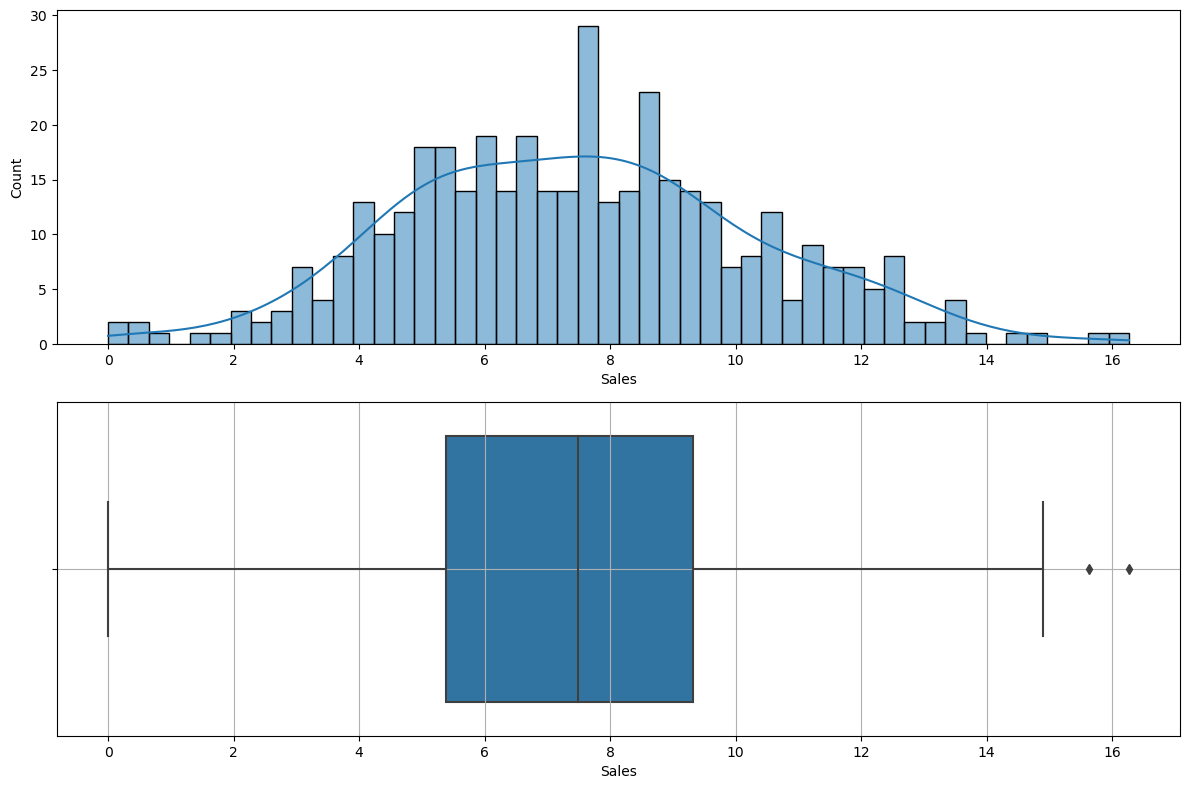

In [83]:
def vis(data,var,bins=20):
    des(data,var) # display(data[[var]].describe().T)
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde=True)

    plt.subplot(2,1,2)
    sns.boxplot(x=data[var])
    plt.grid()
    
    plt.tight_layout()
    plt.show()

vis(data,var,50)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

5) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

## (2) CompPrice

In [37]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [38]:
des(data,var)

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


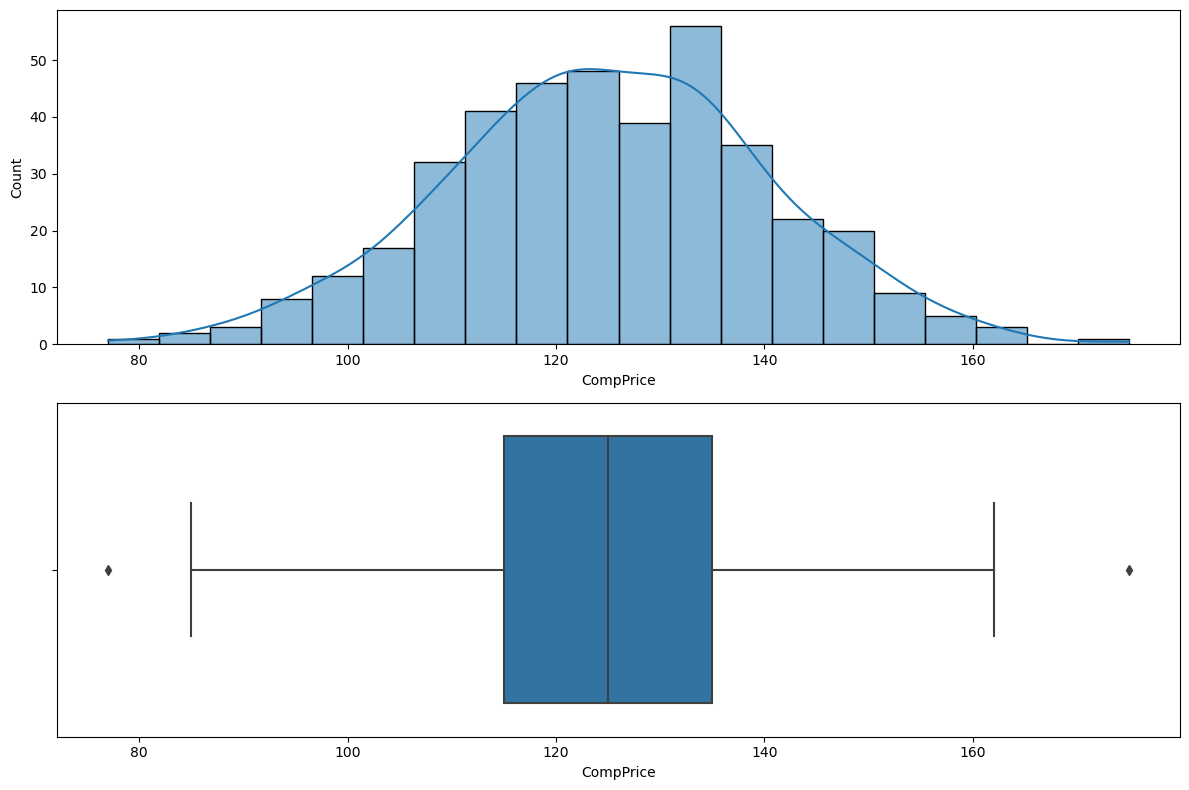

In [39]:
vis(data,var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

자사 상품과의 비교를 해 보고 싶다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


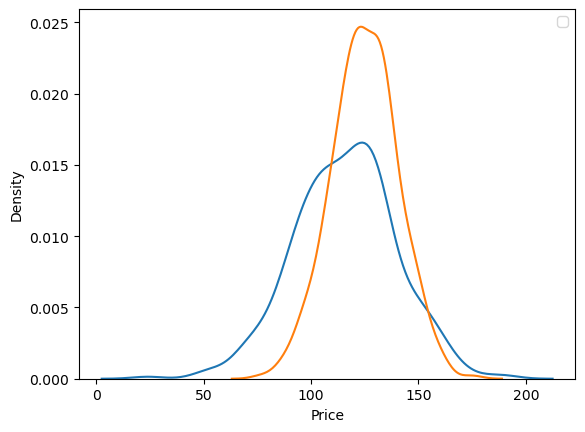

In [86]:
sns.kdeplot(x="Price",data=data)
sns.kdeplot(x="CompPrice",data=data)
plt.show()

## (3) Income

In [40]:
var = "Income"

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [41]:
des(data,var)

,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


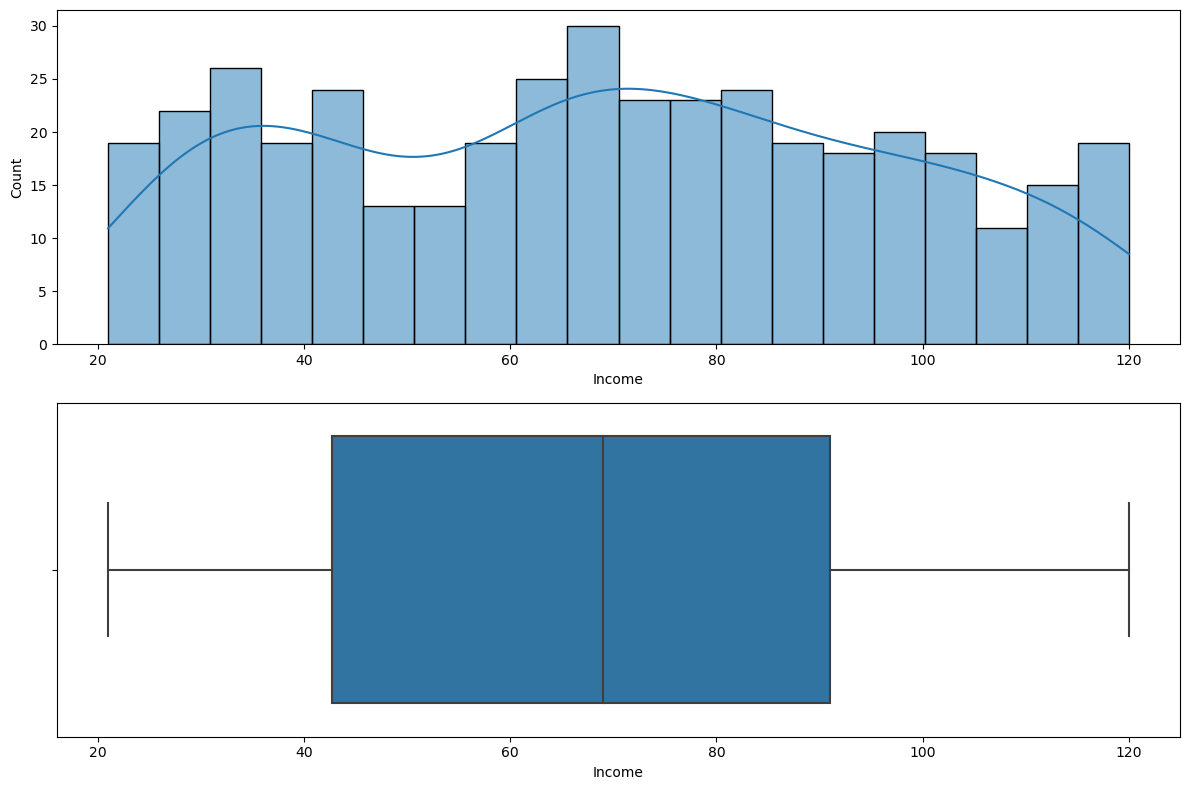

In [42]:
vis(data,var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (4) Advertising

In [87]:
var = 'Advertising'

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [88]:
des(data,var)

,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


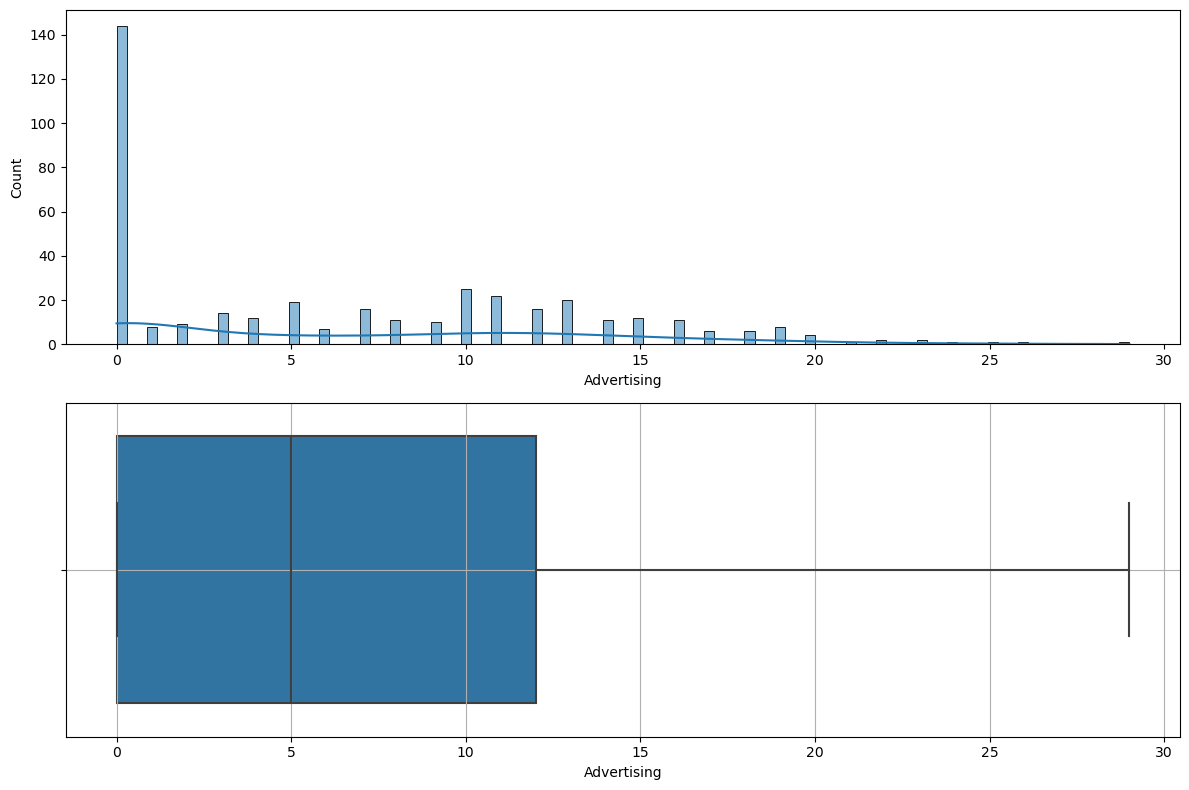

In [89]:
vis(data,var,bins=100)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

0을 제외하고 분석?

,count,mean,std,min,25%,50%,75%,max
Advertising,256.0,10.367188,5.509879,1.0,6.0,10.0,14.0,29.0


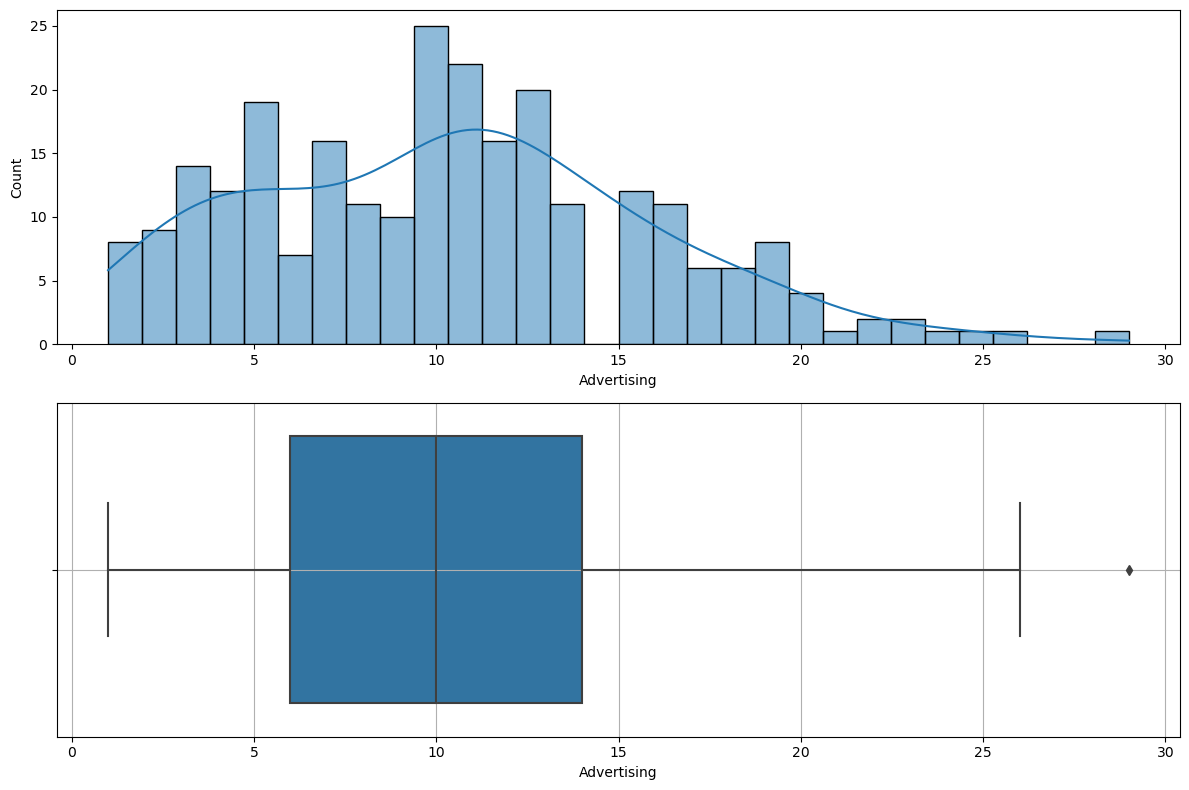

In [90]:
temp = data.loc[data['Advertising']>0]
vis(temp,'Advertising', 30)

## (5) Population

In [52]:
var = 'Population'

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [ ]:
des(data,var)

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


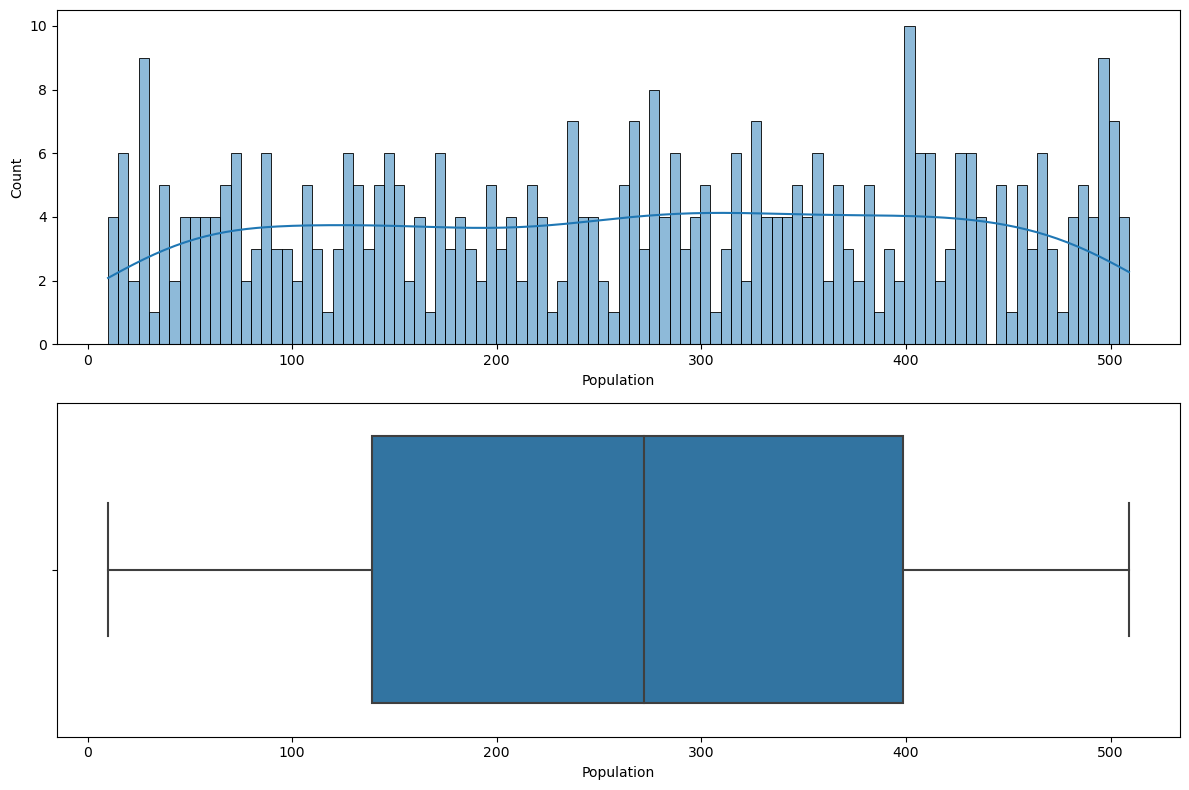

In [53]:
vis(data,var,bins=100)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (6) Price

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (7) Age

In [97]:
var = 'Age'

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

,count,mean,std,min,25%,50%,75%,max
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0


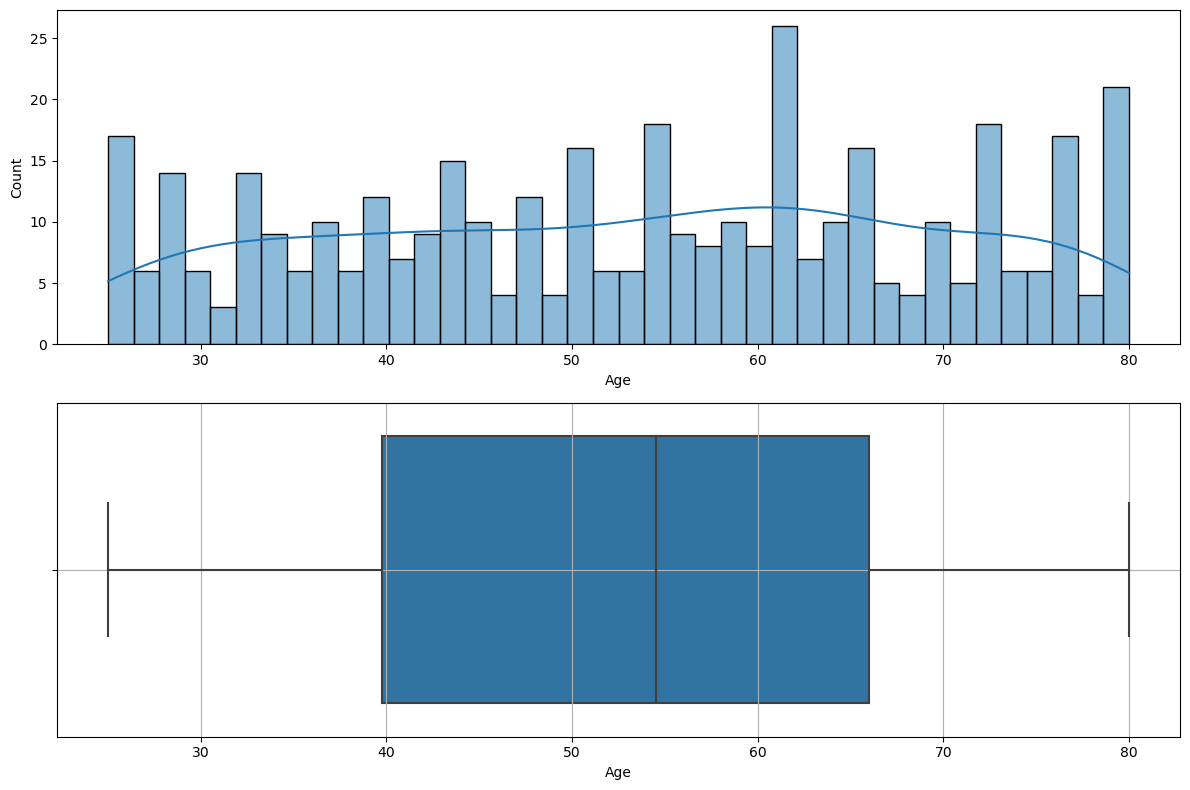

In [100]:
vis(data,var,bins=40)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

# 4.단변량분석 : 범주형 변수

## (1) ShelveLoc

In [91]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

In [63]:
# 범주별 빈도수
data[var].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [70]:
# 범주별 비율
def desd(data,var):
    display(data[var].value_counts() / data[var].shape[0])
desd(data,var)

Yes    0.705
No     0.295
Name: Urban, dtype: float64

3) 분포 확인(시각화)

Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64

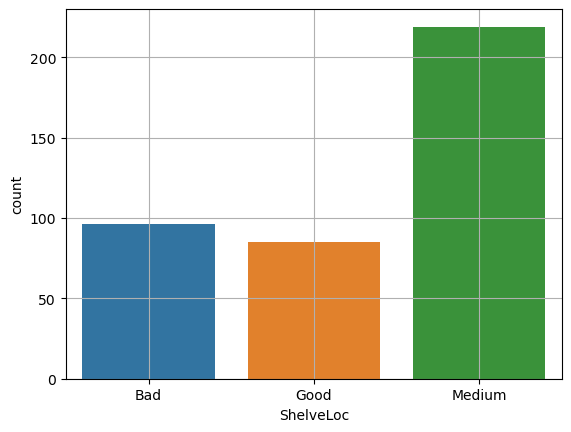

In [93]:
def visd(data,var):
    desd(data,var)
    sns.countplot(x=data[var])#, order = ['Good','Medium','Bad'])
    plt.grid()
    plt.show()
visd(data,var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

5) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

## (2) Urban

In [94]:
var = 'Urban'

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [73]:
desd(data,var)

Yes    0.705
No     0.295
Name: Urban, dtype: float64

3) 분포 확인(시각화)

Yes    0.705
No     0.295
Name: Urban, dtype: float64

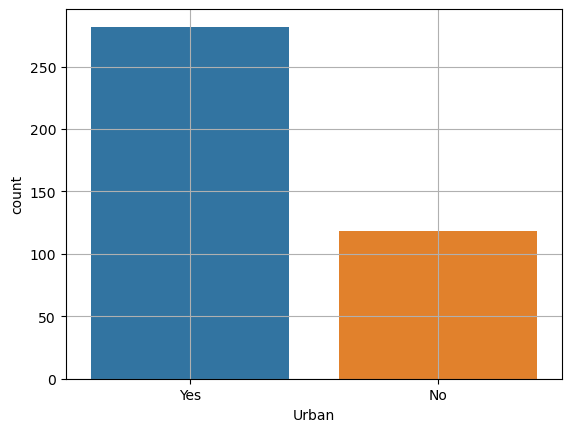

In [95]:
visd(data,var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (3) US

In [75]:
var ="US"

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [78]:
desd(data,var)

Yes    0.645
No     0.355
Name: US, dtype: float64

3) 분포 확인(시각화)

Yes    0.705
No     0.295
Name: Urban, dtype: float64

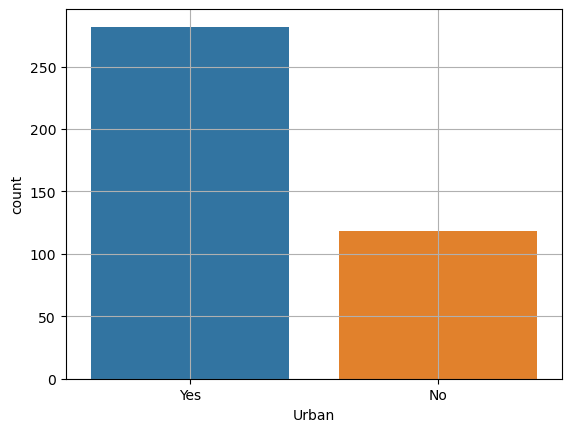

In [96]:
visd(data,var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?